In [1]:
import os

import scipy.ndimage as nd

import matplotlib.pyplot as plt


import astropy.units as u

from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.coordinates import frames

from sunkit_image.coalignment import mapsequence_coalign_by_match_template as mc_coalign
from sunkit_image.coalignment import calculate_match_template_shift as mc_shift

import numpy as np

import cmasher as cmr

from identification_utils import *

from datetime import datetime, timedelta
from astropy.io import fits

/home/sophie-stucki/anaconda3/envs/sunpy/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
###Parameters to load data (see sunpy tutorial)

#mail access
jsoc_email = "stucki@ieec.cat"

#data names
Ic_serie ='hmi.Ic_noLimbDark_720s'
M_serie = 'hmi.M_45s'

#directory to retrieve the files into
path = '/home/sophie-stucki/sunsim/SDO_data'       #SDO fits
maps_path = '/home/sophie-stucki/sunsim/maps'  #classification maps

#False if the data are already download
download_from_sdo = True

#Delete the SDO files after
delete = False

#Plot the SDO maps and the resulting classification
plot = False

# Set the date range you want to loop over
start_date = datetime.strptime('2017-07-01', '%Y-%m-%d')
end_date = datetime.strptime('2017-09-01', '%Y-%m-%d')  

step_size = 1   #in days

# Downsampling
out_shape = (1024, 1024)

#Noise threshold (from Sen & al. 2023)
noise_thresh = 8

#Contrast threshold
I_th = 0.89

In [ ]:
cont_map_list = []
los_map_list = []
t_list = []
days_list = []


# Loop day by day
current_date = start_date
while current_date < end_date:
    # Time range for this day
    start_time = current_date.replace(hour=0, minute=0, second=0)
    end_time = start_time + timedelta(seconds=30)

    # Format if needed
    start_str = start_time.strftime('%Y-%m-%dT%H:%M:%S')
    end_str = end_time.strftime('%Y-%m-%dT%H:%M:%S')

    print(f"Processing {start_str} to {end_str}")

    # Put your SunPy/Fido data access or map logic here

    ###Load the data
    date_str = current_date.strftime('%Y%m%d')
    nbr_day = (current_date - start_date).days
    days_list.append(nbr_day)

    if download_from_sdo:
        try:
            cont_sequence, los_sequence = load_data(start_time, end_time, jsoc_email, Ic_serie, M_serie, path=path)

            cont_map = cont_sequence.maps[0]
            los_map = los_sequence.maps[0]
        except:
            pass

    else:      

        cont_filename = f"{path}/hmi.ic_nolimbdark_720s.{date_str}_000000_TAI.3.continuum.fits"
        los_filename = f"{path}/hmi.m_45s.{date_str}_000045_TAI.2.magnetogram.fits"

        if os.path.exists(cont_filename) and os.path.exists(los_filename):
            cont_fits = fits.open(cont_filename)
            cont_map = sunpy.map.Map(cont_fits[1].data,cont_fits[1].header, sequence=False, allow_errors=True)

            los_fits = fits.open(los_filename)
            los_map = sunpy.map.Map(los_fits[1].data, los_fits[1].header, sequence=True, allow_errors=True)
        

    t_list.append(date_str)
    cont_map_list.append(cont_map)
    los_map_list.append(los_map)
       
    if plot:
        two_graphs_plot(cont_map, los_map)

    if delete:
        if os.path.exists(f"{path}/hmi.ic_nolimbdark_720s.{date_str}_000000_TAI.3.continuum.fits"):
            os.remove(f"{path}/hmi.ic_nolimbdark_720s.{date_str}_000000_TAI.3.continuum.fits")
            print(f" Deleting {path}/hmi.ic_nolimbdark_720s.{date_str}_000000_TAI.3.continuum.fits")
        else:
            print(f"Error: the file {path}/hmi.ic_nolimbdark_720s.{date_str}_000000_TAI.3.continuum.fits doesn't exist") 

        if os.path.exists(f"{path}/hmi.m_45s.{date_str}_000045_TAI.2.magnetogram.fits"):
            os.remove(f"{path}/hmi.m_45s.{date_str}_000045_TAI.2.magnetogram.fits")
            print(f"Deleting {path}/hmi.m_45s.{date_str}_000045_TAI.2.magnetogram.fits")
        else:
            print(f"Error: the file {path}/hmi.m_45s.{date_str}_000045_TAI.2.magnetogram.fits doesn't exist") 

    # Move to the next day
    current_date += timedelta(days=int(step_size))

np.savetxt(maps_path+'days_list.txt', days_list)

Processing 2017-07-01T00:00:00 to 2017-07-01T00:00:30


2025-09-02 11:53:06 - drms - INFO: Export request pending. [id=JSOC_20250901_001010, status=2]
2025-09-02 11:53:06 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:53:07 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.36s/file]
2025-09-02 11:53:19 - drms - INFO: Export request pending. [id=JSOC_20250901_001012, status=2]
2025-09-02 11:53:19 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:53:20 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.35s/file]


Processing 2017-07-02T00:00:00 to 2017-07-02T00:00:30


2025-09-02 11:53:32 - drms - INFO: Export request pending. [id=JSOC_20250902_002020, status=2]
2025-09-02 11:53:32 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:53:33 - drms - INFO: Export request pending. [id=JSOC_20250902_002020, status=1]
2025-09-02 11:53:33 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:53:39 - drms - INFO: Export request pending. [id=JSOC_20250902_002020, status=1]
2025-09-02 11:53:39 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:53:44 - drms - INFO: Export request pending. [id=JSOC_20250902_002020, status=1]
2025-09-02 11:53:44 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:53:50 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:13<00:00, 13.29s/file]
2025-09-02 11:54:14 - drms - INFO: Export request pending. [id=JSOC_20250902_002022, status=2]
2025-09-02 11:54:14 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:54:15 - drms - INFO: Export request pending. [id=JSOC_20250902_002022, status=1]
2025-09-02 11:54:15 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:54:20 - drms - INFO: Export request pending. [id=JSOC_20250902_002022, status=1]
2025-09-02 11:54:20 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:54:26 - drms - INFO: Export request pending. [id=JSOC_20250902_002022, status=1]
2025-09-02 11:54:26 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:54:31 - drms - INFO: Export request pending. [id=JSOC_20250902_002022, status=1]
2025-09-02 11:54:31 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:54:37 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:14<00:00, 14.51s/file]


Processing 2017-07-03T00:00:00 to 2017-07-03T00:00:30


2025-09-02 11:55:03 - drms - INFO: Export request pending. [id=JSOC_20250902_002024, status=2]
2025-09-02 11:55:03 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:55:03 - drms - INFO: Export request pending. [id=JSOC_20250902_002024, status=1]
2025-09-02 11:55:03 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:09 - drms - INFO: Export request pending. [id=JSOC_20250902_002024, status=1]
2025-09-02 11:55:09 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:14 - drms - INFO: Export request pending. [id=JSOC_20250902_002024, status=1]
2025-09-02 11:55:14 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:20 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:10<00:00, 10.09s/file]
2025-09-02 11:55:41 - drms - INFO: Export request pending. [id=JSOC_20250902_002029, status=2]
2025-09-02 11:55:41 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:55:42 - drms - INFO: Export request pending. [id=JSOC_20250902_002029, status=1]
2025-09-02 11:55:42 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:47 - drms - INFO: Export request pending. [id=JSOC_20250902_002029, status=1]
2025-09-02 11:55:47 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:53 - drms - INFO: Export request pending. [id=JSOC_20250902_002029, status=1]
2025-09-02 11:55:53 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:55:58 - drms - INFO: Export request pending. [id=JSOC_20250902_002029, status=1]
2025-09-02 11:55:58 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:04 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:07<00:00,  7.48s/file]


Processing 2017-07-04T00:00:00 to 2017-07-04T00:00:30


2025-09-02 11:56:23 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=2]
2025-09-02 11:56:23 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:56:24 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=1]
2025-09-02 11:56:24 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:29 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=1]
2025-09-02 11:56:29 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:35 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=1]
2025-09-02 11:56:35 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:40 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=1]
2025-09-02 11:56:40 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:46 - drms - INFO: Export request pending. [id=JSOC_20250902_002030, status=1]
2025-09-02 11:56:46 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:56:52 - drms - INFO: Export request pending. [id=JSOC_20

INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:08<00:00,  8.61s/file]
2025-09-02 11:57:56 - drms - INFO: Export request pending. [id=JSOC_20250902_002036, status=2]
2025-09-02 11:57:56 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:57:56 - drms - INFO: Export request pending. [id=JSOC_20250902_002036, status=1]
2025-09-02 11:57:56 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:02 - drms - INFO: Export request pending. [id=JSOC_20250902_002036, status=1]
2025-09-02 11:58:02 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:08 - drms - INFO: Export request pending. [id=JSOC_20250902_002036, status=1]
2025-09-02 11:58:08 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:13 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:11<00:00, 11.92s/file]


Processing 2017-07-05T00:00:00 to 2017-07-05T00:00:30


2025-09-02 11:58:37 - drms - INFO: Export request pending. [id=JSOC_20250902_002038, status=2]
2025-09-02 11:58:37 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:58:37 - drms - INFO: Export request pending. [id=JSOC_20250902_002038, status=1]
2025-09-02 11:58:37 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:43 - drms - INFO: Export request pending. [id=JSOC_20250902_002038, status=1]
2025-09-02 11:58:43 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:48 - drms - INFO: Export request pending. [id=JSOC_20250902_002038, status=1]
2025-09-02 11:58:48 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:58:54 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:16<00:00, 16.94s/file]
2025-09-02 11:59:22 - drms - INFO: Export request pending. [id=JSOC_20250902_002040, status=2]
2025-09-02 11:59:22 - drms - INFO: Waiting for 0 seconds...
2025-09-02 11:59:23 - drms - INFO: Export request pending. [id=JSOC_20250902_002040, status=1]
2025-09-02 11:59:23 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:59:28 - drms - INFO: Export request pending. [id=JSOC_20250902_002040, status=1]
2025-09-02 11:59:28 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:59:34 - drms - INFO: Export request pending. [id=JSOC_20250902_002040, status=1]
2025-09-02 11:59:34 - drms - INFO: Waiting for 5 seconds...
2025-09-02 11:59:39 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:08<00:00,  8.17s/file]


Processing 2017-07-06T00:00:00 to 2017-07-06T00:00:30


2025-09-02 11:59:59 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=2]
2025-09-02 11:59:59 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:00:00 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=1]
2025-09-02 12:00:00 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:05 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=1]
2025-09-02 12:00:05 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:11 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=1]
2025-09-02 12:00:11 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:16 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=1]
2025-09-02 12:00:16 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:22 - drms - INFO: Export request pending. [id=JSOC_20250902_002043, status=1]
2025-09-02 12:00:22 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:28 - sunpy - INFO: 1 URLs found for download. Full re

INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:08<00:00,  8.45s/file]
2025-09-02 12:00:48 - drms - INFO: Export request pending. [id=JSOC_20250902_002047, status=2]
2025-09-02 12:00:48 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:00:49 - drms - INFO: Export request pending. [id=JSOC_20250902_002047, status=1]
2025-09-02 12:00:49 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:00:54 - drms - INFO: Export request pending. [id=JSOC_20250902_002047, status=1]
2025-09-02 12:00:54 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:00 - drms - INFO: Export request pending. [id=JSOC_20250902_002047, status=1]
2025-09-02 12:01:00 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:05 - drms - INFO: Export request pending. [id=JSOC_20250902_002047, status=1]
2025-09-02 12:01:05 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:11 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:10<00:00, 10.25s/file]


Processing 2017-07-07T00:00:00 to 2017-07-07T00:00:30


2025-09-02 12:01:33 - drms - INFO: Export request pending. [id=JSOC_20250902_002050, status=2]
2025-09-02 12:01:33 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:01:34 - drms - INFO: Export request pending. [id=JSOC_20250902_002050, status=1]
2025-09-02 12:01:34 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:40 - drms - INFO: Export request pending. [id=JSOC_20250902_002050, status=1]
2025-09-02 12:01:40 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:46 - drms - INFO: Export request pending. [id=JSOC_20250902_002050, status=1]
2025-09-02 12:01:46 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:51 - drms - INFO: Export request pending. [id=JSOC_20250902_002050, status=1]
2025-09-02 12:01:51 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:01:57 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:07<00:00,  7.95s/file]
2025-09-02 12:02:16 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=2]
2025-09-02 12:02:16 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:02:16 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=1]
2025-09-02 12:02:16 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:02:22 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=1]
2025-09-02 12:02:22 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:02:27 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=1]
2025-09-02 12:02:27 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:02:33 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=1]
2025-09-02 12:02:33 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:02:39 - drms - INFO: Export request pending. [id=JSOC_20250902_002052, status=1]
2025-09-02 12:02:39 - drms - INFO: Waiting for 5 seconds...
2025

INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:08<00:00,  8.97s/file]


Processing 2017-07-08T00:00:00 to 2017-07-08T00:00:30


2025-09-02 12:03:05 - drms - INFO: Export request pending. [id=JSOC_20250901_001013, status=2]
2025-09-02 12:03:05 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:03:06 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.34s/file]
2025-09-02 12:03:19 - drms - INFO: Export request pending. [id=JSOC_20250901_001014, status=2]
2025-09-02 12:03:19 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:03:19 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:01<00:00,  1.33s/file]


Processing 2017-07-09T00:00:00 to 2017-07-09T00:00:30


2025-09-02 12:03:32 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=2]
2025-09-02 12:03:32 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:03:33 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=1]
2025-09-02 12:03:33 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:03:38 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=1]
2025-09-02 12:03:38 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:03:44 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=1]
2025-09-02 12:03:44 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:03:50 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=1]
2025-09-02 12:03:50 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:03:55 - drms - INFO: Export request pending. [id=JSOC_20250902_002053, status=1]
2025-09-02 12:03:55 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:04:01 - sunpy - INFO: 1 URLs found for download. Full re

INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:07<00:00,  7.32s/file]
2025-09-02 12:04:20 - drms - INFO: Export request pending. [id=JSOC_20250902_002056, status=2]
2025-09-02 12:04:20 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:04:21 - drms - INFO: Export request pending. [id=JSOC_20250902_002056, status=1]
2025-09-02 12:04:21 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:04:26 - drms - INFO: Export request pending. [id=JSOC_20250902_002056, status=1]
2025-09-02 12:04:26 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:04:32 - drms - INFO: Export request pending. [id=JSOC_20250902_002056, status=1]
2025-09-02 12:04:32 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:04:37 - drms - INFO: Export request pending. [id=JSOC_20250902_002056, status=1]
2025-09-02 12:04:37 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:04:43 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:08<00:00,  8.38s/file]


Processing 2017-07-10T00:00:00 to 2017-07-10T00:00:30


2025-09-02 12:05:03 - drms - INFO: Export request pending. [id=JSOC_20250902_002057, status=2]
2025-09-02 12:05:03 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:05:03 - drms - INFO: Export request pending. [id=JSOC_20250902_002057, status=1]
2025-09-02 12:05:03 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:09 - drms - INFO: Export request pending. [id=JSOC_20250902_002057, status=1]
2025-09-02 12:05:09 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:15 - drms - INFO: Export request pending. [id=JSOC_20250902_002057, status=1]
2025-09-02 12:05:15 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:20 - drms - INFO: Export request pending. [id=JSOC_20250902_002057, status=1]
2025-09-02 12:05:20 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:26 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:09<00:00,  9.85s/file]
2025-09-02 12:05:48 - drms - INFO: Export request pending. [id=JSOC_20250902_002059, status=2]
2025-09-02 12:05:48 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:05:48 - drms - INFO: Export request pending. [id=JSOC_20250902_002059, status=1]
2025-09-02 12:05:48 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:54 - drms - INFO: Export request pending. [id=JSOC_20250902_002059, status=1]
2025-09-02 12:05:54 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:05:59 - drms - INFO: Export request pending. [id=JSOC_20250902_002059, status=1]
2025-09-02 12:05:59 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:05 - drms - INFO: Export request pending. [id=JSOC_20250902_002059, status=1]
2025-09-02 12:06:05 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:11 - sunpy - INFO: 1 URLs found for download. Full request totaling 15MB


INFO: 1 URLs found for download. Full request totaling 15MB [sunpy.net.jsoc.jsoc]


Files Downloaded: 100%|██████████| 1/1 [00:07<00:00,  7.35s/file]


Processing 2017-07-11T00:00:00 to 2017-07-11T00:00:30


2025-09-02 12:06:29 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=2]
2025-09-02 12:06:29 - drms - INFO: Waiting for 0 seconds...
2025-09-02 12:06:30 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=1]
2025-09-02 12:06:30 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:35 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=1]
2025-09-02 12:06:35 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:41 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=1]
2025-09-02 12:06:41 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:47 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=1]
2025-09-02 12:06:47 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:52 - drms - INFO: Export request pending. [id=JSOC_20250902_002062, status=1]
2025-09-02 12:06:52 - drms - INFO: Waiting for 5 seconds...
2025-09-02 12:06:58 - drms - INFO: Export request pending. [id=JSOC_20

Processing 20170701


2025-08-22 13:28:51 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


462
Processing 20170702


2025-08-22 13:28:53 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


467
Processing 20170703


2025-08-22 13:28:54 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


449
Processing 20170704


2025-08-22 13:28:55 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


416
Processing 20170705


2025-08-22 13:28:56 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


425
Processing 20170706


2025-08-22 13:28:58 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


440
Processing 20170707


2025-08-22 13:28:59 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


466
Processing 20170708


2025-08-22 13:29:00 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


483
Processing 20170709


2025-08-22 13:29:01 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


483
Processing 20170710


2025-08-22 13:29:02 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


480
Processing 20170711


2025-08-22 13:29:04 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


501
Processing 20170712


2025-08-22 13:29:05 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


493
Processing 20170713


2025-08-22 13:29:06 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


514
Processing 20170714


2025-08-22 13:29:07 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


566
Processing 20170715


2025-08-22 13:29:08 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


567
Processing 20170716


2025-08-22 13:29:09 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


542
Processing 20170717


2025-08-22 13:29:10 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


555
Processing 20170718


2025-08-22 13:29:12 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


525
Processing 20170719


2025-08-22 13:29:13 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


499
Processing 20170720


2025-08-22 13:29:14 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


475
Processing 20170721


2025-08-22 13:29:15 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


470
Processing 20170722


2025-08-22 13:29:16 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


460
Processing 20170723


2025-08-22 13:29:17 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


460
Processing 20170724


2025-08-22 13:29:18 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


423
Processing 20170725


2025-08-22 13:29:19 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


441
Processing 20170726


2025-08-22 13:29:21 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


448
Processing 20170727


2025-08-22 13:29:22 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


444
Processing 20170728


2025-08-22 13:29:23 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


402
Processing 20170729


2025-08-22 13:29:24 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


434
Processing 20170730


2025-08-22 13:29:25 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


422
Processing 20170731


2025-08-22 13:29:27 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


433
Processing 20170801


2025-08-22 13:29:28 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


407
Processing 20170802


2025-08-22 13:29:29 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


436
Processing 20170803


2025-08-22 13:29:30 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


412
Processing 20170804


2025-08-22 13:29:32 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


441
Processing 20170805


2025-08-22 13:29:33 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


478
Processing 20170806


2025-08-22 13:29:34 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


478
Processing 20170807


2025-08-22 13:29:35 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


488
Processing 20170808


2025-08-22 13:29:37 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


498
Processing 20170809


2025-08-22 13:29:38 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


549
Processing 20170810


2025-08-22 13:29:39 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


543
Processing 20170811


2025-08-22 13:29:40 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


540
Processing 20170812


2025-08-22 13:29:41 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


535
Processing 20170813


2025-08-22 13:29:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


544
Processing 20170814


2025-08-22 13:29:44 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


533
Processing 20170815


2025-08-22 13:29:45 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


488
Processing 20170816


2025-08-22 13:29:46 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


470
Processing 20170817


2025-08-22 13:29:47 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


484
Processing 20170818


2025-08-22 13:29:48 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


463
Processing 20170819


2025-08-22 13:29:49 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


453
Processing 20170820


2025-08-22 13:29:51 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


404
Processing 20170821


2025-08-22 13:29:52 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


423
Processing 20170822


2025-08-22 13:29:53 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


416
Processing 20170823


2025-08-22 13:29:54 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


405
Processing 20170824


2025-08-22 13:29:55 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


429
Processing 20170825


2025-08-22 13:29:56 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


423
Processing 20170826


2025-08-22 13:29:57 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


415
Processing 20170827


2025-08-22 13:29:59 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


405
Processing 20170828


2025-08-22 13:30:00 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


421
Processing 20170829


2025-08-22 13:30:02 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


447
Processing 20170830


2025-08-22 13:30:03 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


448
Processing 20170831


2025-08-22 13:30:04 - sunpy - WARNING: SunpyMetadataWarning: The meta key  is not valid ascii, dropping from the FITS header


500


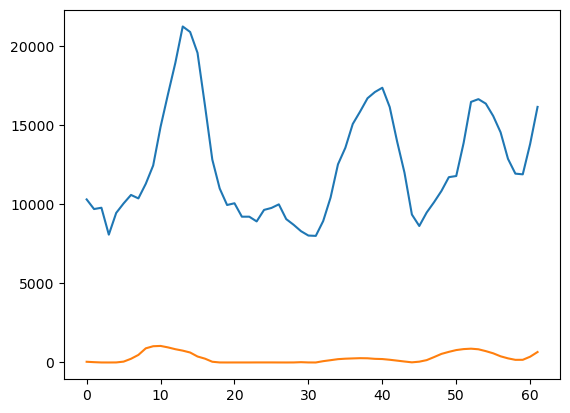

In [ ]:
#Filling factors
ff_sp = []
ff_fc = []

#Cutoff
min_list = []
max_list = []


for i in range(len(t_list)):

    t = t_list[i]
    cont_map = cont_map_list[i]
    los_map = los_map_list[i][0]

    print(f"Processing {t}")

    RAW_size = cont_map.dimensions

    # downsampling
    cont_map = cont_map.resample(out_shape * u.pix)
    los_map = los_map.resample(out_shape * u.pix)   


    # coordinates
    xg, yg = coord_grid(los_map)

    # remove the noise
    los_sequence_updated = sunpy.map.MapSequence(noise_threshold(los_map, threshold=noise_thresh)) 
    # remove the foreshortening effects
    los_sequence_updated = sunpy.map.MapSequence(removing_foreshortening_effect(los_sequence_updated.maps[0],xg,yg))

    # crop
    min_p = int(np.argwhere(cont_map.data[int(out_shape[0]/2), :] >= 0 ).min() - 1)
    max_p = int(np.argwhere(cont_map.data[int(out_shape[0]/2), :] >= 0 ).max() + 1)

    min_list.append(min_p)
    max_list.append(max_p)

    cont_map = sunpy.map.sources.HMIMap(cont_map.data[min_p:max_p, min_p:max_p], cont_map.fits_header)
    los_map = sunpy.map.sources.HMIMap(np.abs(los_sequence_updated.maps[0].data[min_p:max_p, min_p:max_p]), los_sequence_updated.maps[0].fits_header)

    xg = xg[min_p:max_p, min_p:max_p]
    yg = yg[min_p:max_p, min_p:max_p]

    # plot the new sdo images
    if plot:
        two_graphs_plot(cont_map, los_map)

    ### identification following Sen & al. 2023

    active_area = active_area_identification(cont_map, los_map, xg, yg, I_th=I_th)
    spot_area, smooth_spot_area, feature_area, smooth_feature_area = active_area_smoothing(active_area, spot_threshold=0.2, spot_kernel_size=2, feature_threshold=0.2, feature_kernel_size=2) 

    area_th = micro_hemisphere_to_arcsec2(los_sequence_updated.maps[0], 20).value
    identification, plage_nbr = network_identification(feature_area, smooth_feature_area, los_map.scale[0].value, area_th, method='scipy')
    nbr, locs, pxl_area = spot_nbr(spot_area, smooth_spot_area)

    # plot the identification map
    if plot:
        identifiation_plot(identification, spot_area, cont_map, locs, filename=path+'identification_map_downsampling_{}_{}.pdf'.format(int(RAW_size[0].value/out_shape[0]), t))

    ### save the faculae and spot maps for starsim

    facula_map = np.copy(identification)

    facula_map[np.isnan(facula_map)] = 0

    # facula_map = np.zeros(np.shape(identification))
    facula_map[np.isnan(cont_map.data)] = np.nan

    spot_map = np.copy(spot_area)
    # spot_map = np.zeros(np.shape(spot_area))
    
    spot_map[np.isnan(spot_map)] = 0
    spot_map[np.isnan(cont_map.data)] = np.nan

    facula_map = np.flip(facula_map)
    spot_map = np.flip(spot_map)

    ff_sp.append(np.nansum(spot_map))
    ff_fc.append(np.nansum(facula_map))



    np.savetxt(maps_path+'faculae_map_{:.1f}.txt'.format(i), facula_map)
    np.savetxt(maps_path+'spot_map_{:.1f}.txt'.format(i), spot_map)
    np.savetxt(maps_path+'cont_map_{:.1f}.txt'.format(i), np.flip(cont_map.data))
    np.savetxt(maps_path+'los_map_{:.1f}.txt'.format(i), np.flip(los_map.data))

np.savetxt(maps_path+'date.txt', np.int64(t_list))
np.savetxt(maps_path+'ff_sp.txt', ff_sp)
np.savetxt(maps_path+'ff_fc.txt', ff_fc)
np.savetxt(maps_path+'min_p.txt', min_list)
np.savetxt(maps_path+'max_p.txt', max_list)
